#### Author Name : Tejas P B 
#### Email : mailto:tejas.pb@msea.christuniversity.in 

 ## Introduction

This notebook aims at using the Height and Weight Dataset to illustrate: 
1. Perform Statistical Data Analysis on the Dataset
2. Feature Scaling 
3. Perform Exploratory Data Analysis 
4. Prepare the Dataset for applying Linear Regression Model by approaching "Height" as the target variable. 

## Objectives

1. To be able to perform a lab program with neat documentation
2. To scale the variables 
3. To perform a quick EDA on the dataset
4. To perform Linear Regression through the help of Data Transformation. 

## Problem Statement

To clean the dataset and perform statistical analysis. Prepping it for linear regression and illustrate through EDA

## About the dataset

This dataset contains 3 columns of information related to height and weight of male and females. The main focus of the dataset is the "Height" of the individuals, which is the target variable. 

## References


1. Sklearn Documentation: https://scikit-learn.org/stable/
2. Matplot Library Documnentaion: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
3. GeeksForGeeks: https://www.geeksforgeeks.org/
4. StackOverflow: https://stackoverflow.com/

## Conclusion 

The model suggests a statistically significant relationship between the independent variable (Weight) and the dependent variable (Height). However, the model's overall explanatory power is limited (low R-squared).

## Import the required packages

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Import the CSV file

In [67]:
df = pd.read_csv("H&W dataset.csv")
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [68]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [69]:
df.tail()

,Gender,Height,Weight
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461
9999,Female,61.944246,113.649103


#### Check for missing values

In [70]:
print(df.isnull().sum())

Gender    0
Height    0
Weight    0
dtype: int64


#### Descriptive Statistics

Provides summary statistics (mean, std, min, max) for each numerical column.

In [71]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


#### Correlation Analysis
Computes pairwise correlation coefficients between numerical variables.

In [39]:
df.corr()

,Height,Weight
Height,1.000000,0.924756
Weight,0.924756,1.000000


#### Frequency Distribution
The count of unique values in a categorical column.

In [40]:
df.value_counts()

Gender  Height     Weight    
Female  54.263133  64.700127     1
Male    67.830001  172.776569    1
        67.809015  179.934465    1
        67.810251  170.457826    1
        67.814286  192.066392    1
                                ..
Female  64.854997  146.692798    1
        64.855262  150.397118    1
        64.859973  140.784838    1
        64.860659  159.568225    1
Male    78.998742  269.989699    1
Length: 10000, dtype: int64

### Outlier Detection

<Axes: >

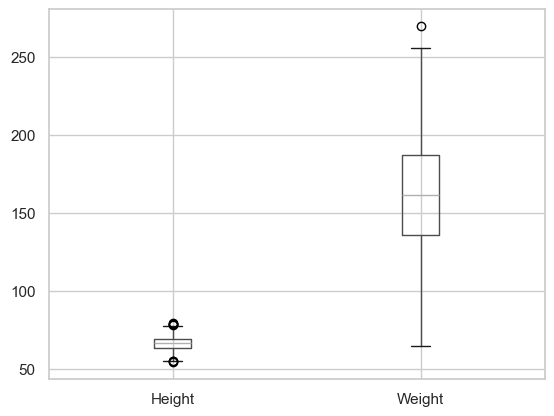

In [41]:
df.boxplot()

In [42]:
import seaborn as sns

### Exploratory Data Analysis

### Distribution of Gender

C:\Users\TEJAS\AppData\Local\Temp\ipykernel_21888\2251557561.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=df, palette='viridis')


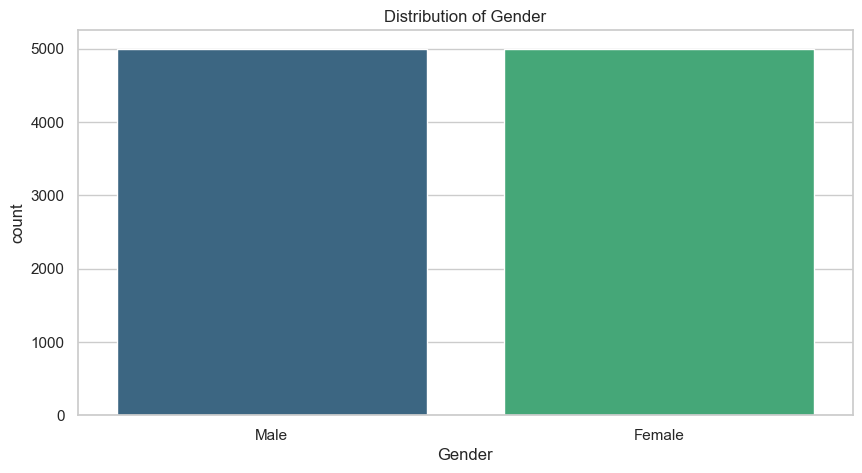

In [43]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.countplot(x='Gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.show()

### Distribution of Height and Weight

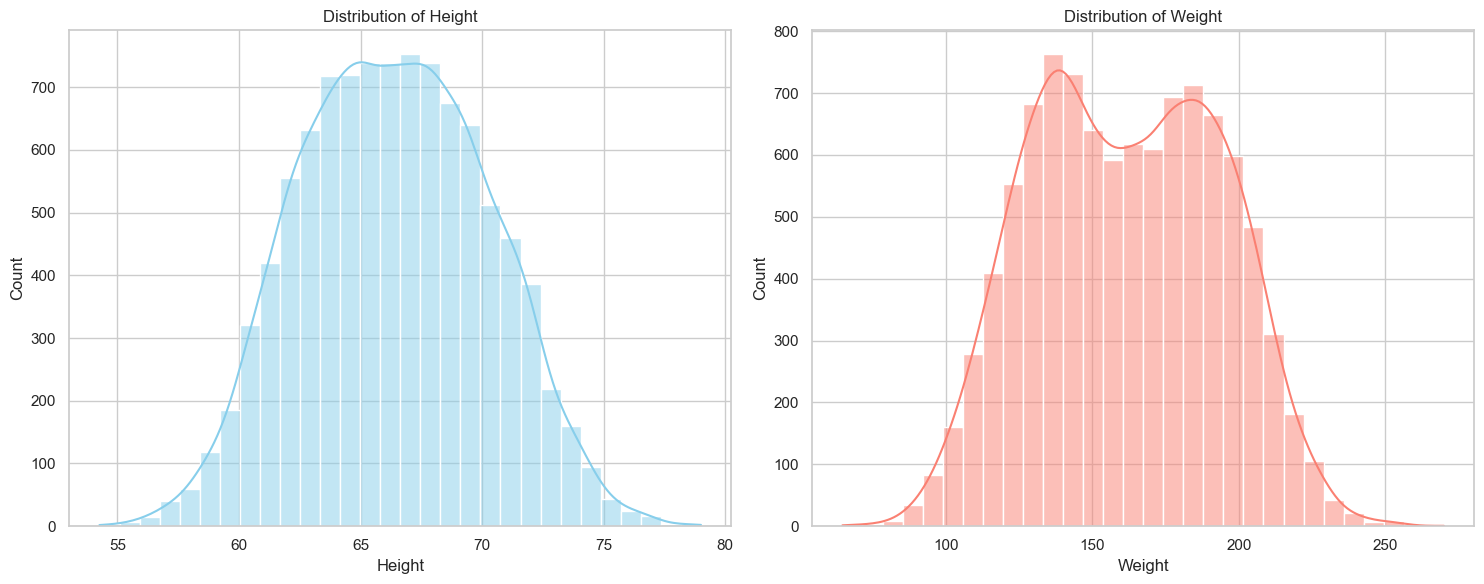

In [44]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Height'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Height')

plt.subplot(1, 2, 2)
sns.histplot(df['Weight'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()

### Scatter plot of Height vs. Weight colored by Gender

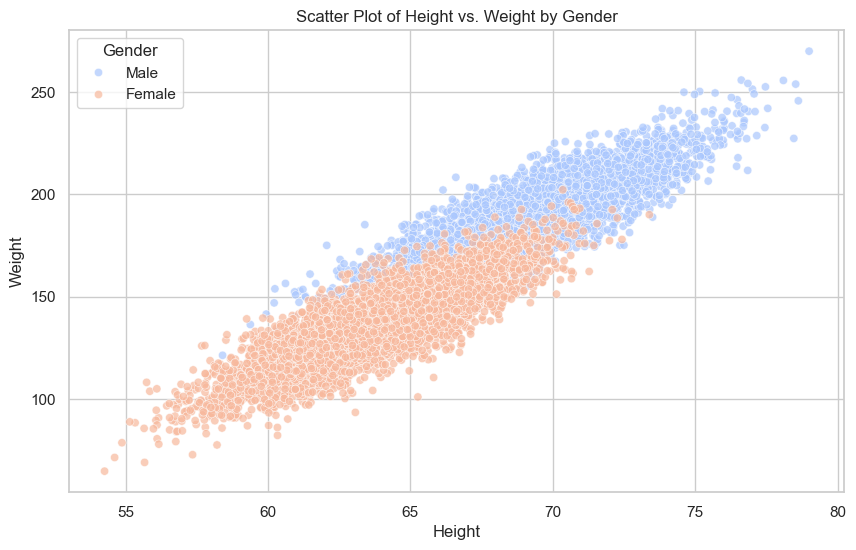

In [45]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Height', y='Weight', hue='Gender', data=df, palette='coolwarm', alpha=0.7)
plt.title('Scatter Plot of Height vs. Weight by Gender')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## Independent and dependent features

In [46]:
X=df[['Weight']] ### independent features should be data frame or 2 dimesnional array
y=df['Height'] ## this variable can be in series or 1d array

In [47]:
X_series=df['Weight']
np.array(X_series).shape

(10000,)

In [48]:
np.array(y).shape

(10000,)

### Train Test Split

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

## Standardization

In [51]:
from sklearn.preprocessing import StandardScaler

In [52]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [53]:
X_test=scaler.transform(X_test)

### Apply Simple Linear Regression

In [54]:
from sklearn.linear_model import LinearRegression

In [55]:
regression=LinearRegression()

In [56]:
regression.fit(X_train,y_train)

LinearRegression()

In [57]:
print("Coefficient or slope:",regression.coef_)
print("Intercept:",regression.intercept_)

Coefficient or slope: [3.55313486]
Intercept: 66.32026277291251


#### Training data plot best fit line

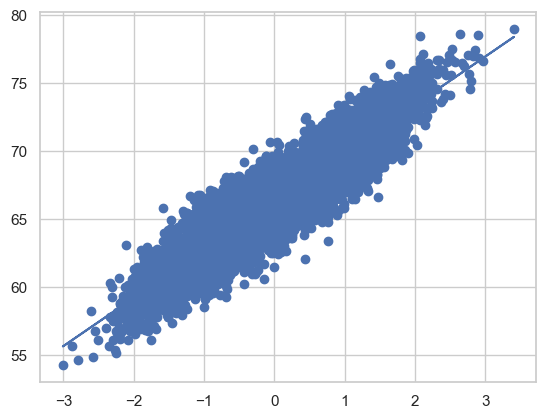

In [58]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

## Prediction of test data
1. Predicted height output= intercept +coef_(Weights)
2. y_pred_test = 66.32 + 3.55(X_test)

In [59]:
## Prediction for test data
y_pred=regression.predict(X_test)

### Performance Metrics

In [60]:
from sklearn.metrics import mean_absolute_error,mean_squared_error ,r2_score

In [61]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print("Mean Squared Error:",mse)
print("Mean Asolute Error:",mae)


Mean Squared Error: 2.1085956151270167
Mean Asolute Error: 1.1600795829040491


In [62]:
score=r2_score(y_test,y_pred)
print(score)

0.8577922082576351


## OLS Linear Regression

In [63]:
import statsmodels.api as sm

In [64]:
model=sm.OLS(y_train,X_train).fit()

In [65]:
prediction=model.predict(X_test)
print(prediction)

[ 1.34015009  3.78665231  1.0185147  ...  2.28994663 -2.51434731
  3.4438509 ]


In [66]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.003
Model:                            OLS   Adj. R-squared (uncentered):              0.003
Method:                 Least Squares   F-statistic:                              20.08
Date:                Tue, 02 Jan 2024   Prob (F-statistic):                    7.55e-06
Time:                        23:11:15   Log-Likelihood:                         -39296.
No. Observations:                7000   AIC:                                  7.859e+04
Df Residuals:                    6999   BIC:                                  7.860e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Inferences

1. R-squared: 0.003 indicates that the model explains only a small proportion of the variance in the dependent variable.
2. An one-unit increase in Weight is associated with a 3.5531 unit increase in the dependent variable (Height).
3. P-value (P>|t|) for Weight is very small (0.000), suggesting that the relationship between Weight and Height is statistically significant.
4. The 95% confidence interval for the coefficient of Weight is [1.999, 5.108].
5. F-statistic: 20.08 with a low Prob (F-statistic) of 7.55e-06 indicates that the model as a whole is statistically significant.
